In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import numpy as np
import os

In [2]:
def produce_initial_profile(mdf_file, df, date):
    thick = []
    with open(mdf_file, 'r') as f:
        lines = f.readlines()
        for index, line in enumerate(lines):
            if line:
                s = line.split()
                if s[0] == 'MNKmax':
                    kmax = int(s[4])
                elif s[0] == 'Ztop':
                    ztop = float(s[2])
                elif s[0] == 'Zbot':
                    zbot = float(s[2])
                elif s[0] == 'Thick':
                    thick.append(float(s[2]))
                    for j in range(index + 1, index + kmax):
                        thick.append(float(lines[j]))
    thick_num = np.array(thick, dtype=float)
    intlaydepth = np.ones(kmax + 1)
    intlaydepth[0] = zbot
    intlaydepth[1:kmax + 1] = zbot + np.cumsum(thick_num / 100 * (ztop - zbot))
    layerdepth = -0.5 * (intlaydepth[0:-1] + intlaydepth[1:])
    interpolator = interp1d(df["depth"], df["temperature"], kind='linear', fill_value='extrapolate')
    new_temperatures = interpolator(layerdepth)
    
    plt.plot(df["temperature"], df["depth"], label="Simstrat")
    plt.plot(new_temperatures, layerdepth, '--', label="New")
    plt.legend()
    plt.show()
    
    whitespace_before = '     '
    whitespace_after = '         '
    strformat = '{:4.10e}'
    out = ["T0" + whitespace_before + "=" + ' ' + strformat.format(new_temperatures[0]) + '\n']
    for i in range(1, len(new_temperatures)):
        out.append(whitespace_after + strformat.format(new_temperatures[i]) + '\n')
        
    with open(os.path.join(os.path.dirname(mdf_file), "profiles", "{}.txt".format(date)), 'w') as f:
        for line in out:
            f.write('%s' % line)

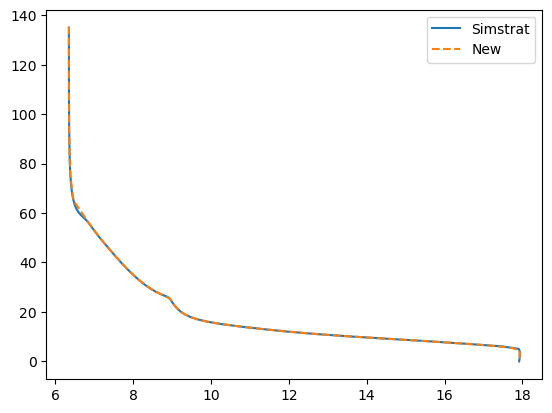

In [3]:
mdf_file = "/home/runnalja/git/alplakes/simulations/static/delft3d-flow/zurich/Simulation_Web.mdf"
df = pd.read_csv("/home/runnalja/Desktop/simstrat_16_profile.csv")
df.columns = ["temperature", "depth"]
date = "20240616"
produce_initial_profile(mdf_file, df, date)

/tmp/ipykernel_30662/3146336756.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"temperature": 7.48, "depth": 91}, ignore_index=True)
/tmp/ipykernel_30662/3146336756.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"temperature": 6.77, "depth": 150}, ignore_index=True)
/tmp/ipykernel_30662/3146336756.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"temperature": 6.73, "depth": 309}, ignore_index=True)


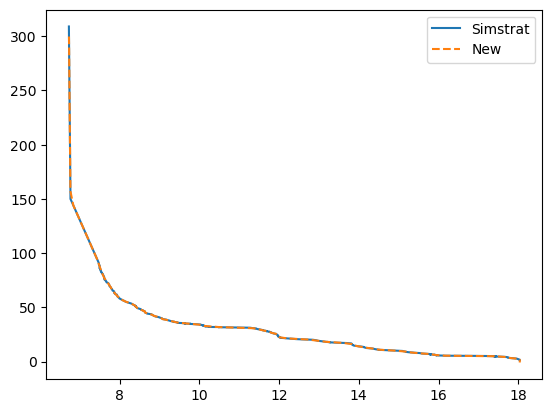

In [4]:
mdf_file = "/home/runnalja/git/alplakes/simulations/static/delft3d-flow/geneva/Simulation_Web.mdf"
df = pd.read_csv("/home/runnalja/Desktop/LéXPLORE_Idronaut_Profiles.csv")
df.columns = ["temperature", "depth"]
df = df.append({"temperature": 7.48, "depth": 91}, ignore_index=True)
df = df.append({"temperature": 6.77, "depth": 150}, ignore_index=True)
df = df.append({"temperature": 6.73, "depth": 309}, ignore_index=True)
date = "20240616"
produce_initial_profile(mdf_file, df, date)